# DATASCIENCE PROJECT

# PREDICTION OF HOUSE PRICES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Data Collection

In [2]:
data=pd.read_csv('housepriceprediction.csv')

### Understanding the Data

In [3]:
data.shape

(2919, 13)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [6]:
data.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [7]:
data.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [8]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [9]:
data.duplicated().sum()

0

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print(object_cols)
print("Categorical variables:",len(object_cols))

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Categorical variables: 4


In [11]:
int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print(num_cols)
print("Integer variables:",len(num_cols))

['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
Integer variables: 6


In [12]:
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print(fl_cols)
print("Float variables:",len(fl_cols))

['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
Float variables: 3


In [13]:
data.isnull()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,False,False,False,False,False,False,True
2915,False,False,False,False,False,False,False,False,False,False,False,False,True
2916,False,False,False,False,False,False,False,False,False,False,False,False,True
2917,False,False,False,False,False,False,False,False,False,False,False,False,True


### Checking for NULL value

In [14]:
bool_series = pd.isnull(data['Id'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [15]:
bool_series = pd.isnull(data['MSSubClass'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [16]:
bool_series = pd.isnull(data['MSZoning'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1915,1915,30,NaN,21780,Inside,1Fam,4,1910,1950,Wd Sdng,0.0,0.0,NaN
2216,2216,20,NaN,14584,Inside,1Fam,5,1952,1952,AsbShng,0.0,0.0,NaN
2250,2250,70,NaN,56600,Inside,1Fam,1,1900,1950,Wd Sdng,0.0,686.0,NaN
2904,2904,20,NaN,31250,Inside,1Fam,3,1951,1951,CBlock,0.0,0.0,NaN


In [17]:
bool_series = pd.isnull(data['LotArea'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [18]:
bool_series = pd.isnull(data['LotConfig'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [19]:
bool_series = pd.isnull(data['BldgType'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [20]:
bool_series = pd.isnull(data['OverallCond'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [21]:
bool_series = pd.isnull(data['YearBuilt'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [22]:
bool_series = pd.isnull(data['YearRemodAdd'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice


In [23]:
bool_series = pd.isnull(data['Exterior1st'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2151,2151,30,RL,19550,Inside,1Fam,7,1940,2007,NaN,0.0,1580.0,NaN


In [24]:
bool_series = pd.isnull(data['BsmtFinSF2'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2120,2120,20,RM,5940,FR3,1Fam,7,1946,1950,MetalSd,NaN,NaN,NaN


In [25]:
bool_series = pd.isnull(data['TotalBsmtSF'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2120,2120,20,RM,5940,FR3,1Fam,7,1946,1950,MetalSd,NaN,NaN,NaN


In [26]:
bool_series = pd.isnull(data['SalePrice'])
data[bool_series]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1460,1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,882.0,NaN
1461,1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,1329.0,NaN
1462,1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,928.0,NaN
1463,1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,926.0,NaN
1464,1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,1280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [27]:
data['SalePrice'].isna().sum()

1459

### Droping rows with NULL values
Since we have a lot of null values, we remove the rows with null values to increase the accuracy of the model.

In [28]:
data=data.dropna()

In [29]:
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [30]:
data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [31]:
data.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [32]:
data.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [33]:
data.Exterior1st.unique()


array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

## Data Cleaning
Data cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are columns that are not important and is irrelevant for the model training. 
Id column is not participating in any prediction. SO we can drop it.

In [34]:
data.drop(['Id'],axis=1,inplace=True)

## Data Visualization 

<AxesSubplot:>

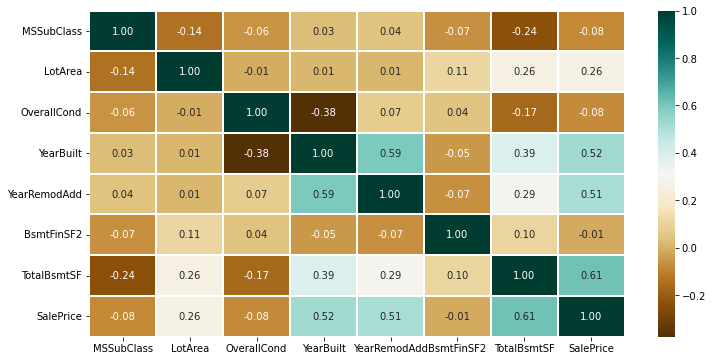

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [36]:
corr_matrix=data.corr()
print(corr_matrix)

              MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
MSSubClass      1.000000 -0.139781    -0.059316   0.027850      0.040581   
LotArea        -0.139781  1.000000    -0.005636   0.014228      0.013788   
OverallCond    -0.059316 -0.005636     1.000000  -0.375983      0.073741   
YearBuilt       0.027850  0.014228    -0.375983   1.000000      0.592855   
YearRemodAdd    0.040581  0.013788     0.073741   0.592855      1.000000   
BsmtFinSF2     -0.065649  0.111170     0.040229  -0.049107     -0.067759   
TotalBsmtSF    -0.238518  0.260833    -0.171098   0.391452      0.291066   
SalePrice      -0.084284  0.263843    -0.077856   0.522897      0.507101   

              BsmtFinSF2  TotalBsmtSF  SalePrice  
MSSubClass     -0.065649    -0.238518  -0.084284  
LotArea         0.111170     0.260833   0.263843  
OverallCond     0.040229    -0.171098  -0.077856  
YearBuilt      -0.049107     0.391452   0.522897  
YearRemodAdd   -0.067759     0.291066   0.507101  
BsmtFinSF

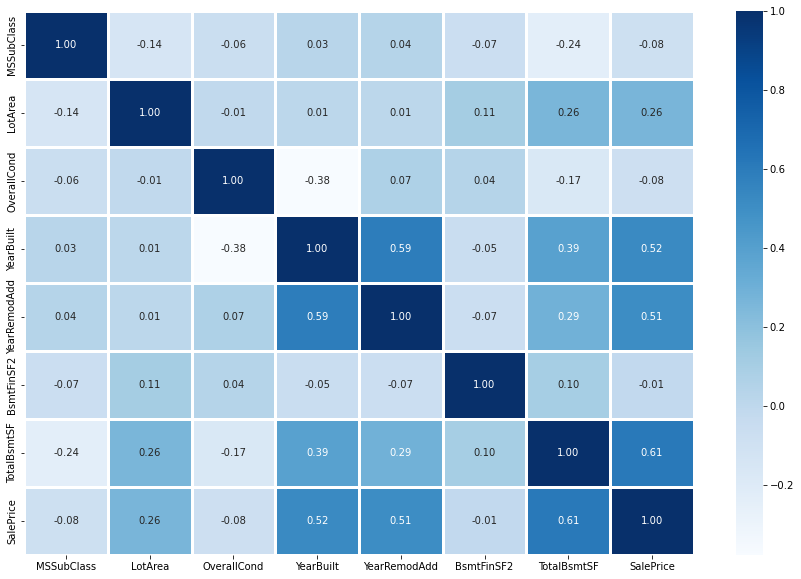

In [37]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=3, 
            fmt= ".2f", 
            cmap="Blues");

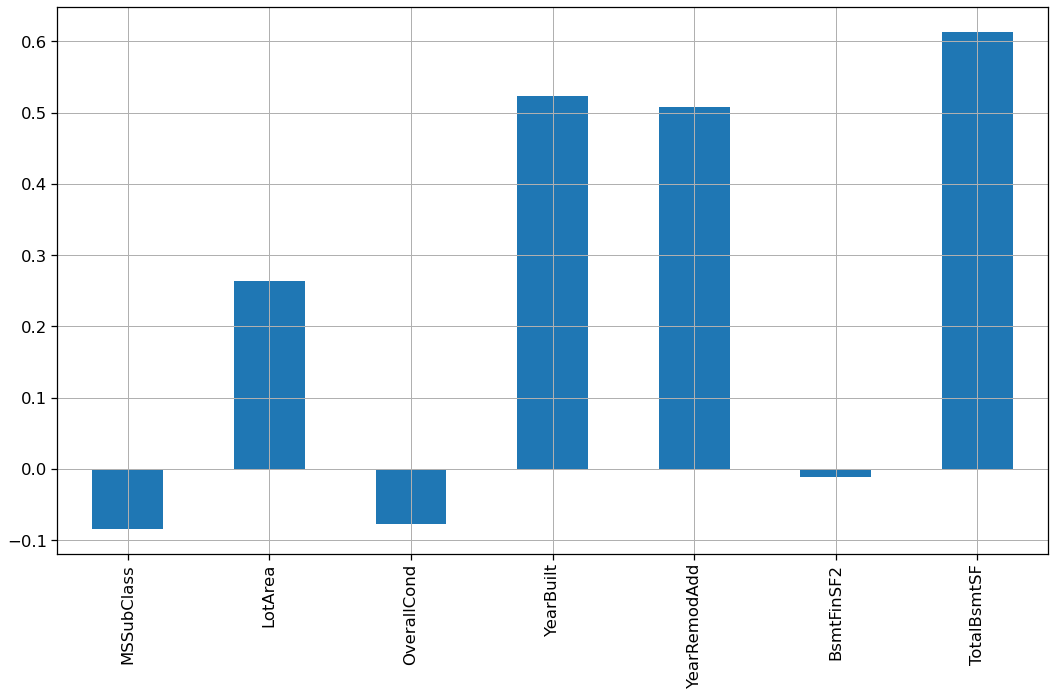

In [38]:
sns.set_context('notebook',font_scale = 1.5)
h=data.drop('SalePrice', axis=1)
h.corrwith(data['SalePrice']).plot(kind='bar', grid=True, figsize=(15, 10))
plt.tight_layout()

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

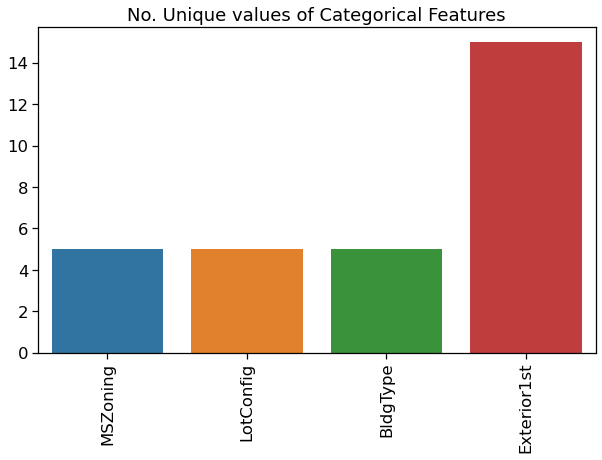

In [39]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

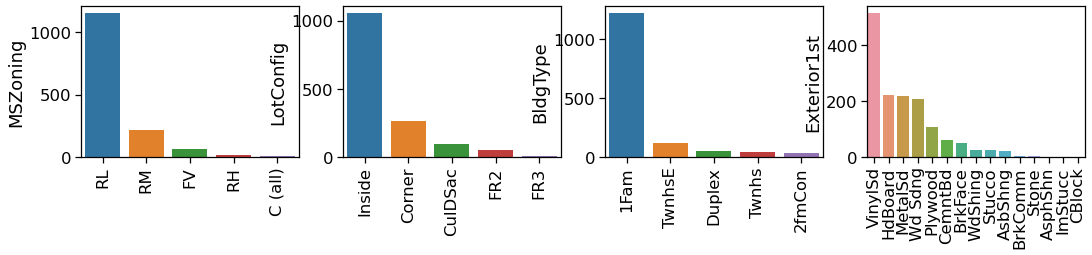

In [40]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

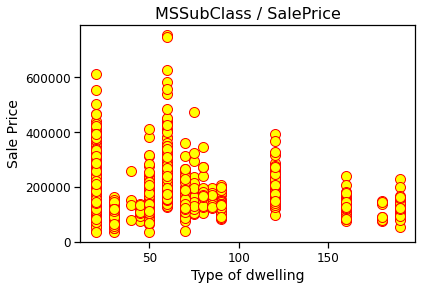

In [41]:
plt.scatter(data['MSSubClass'],data['SalePrice'], color = 'yellow', edgecolor = 'red', s = 100)
plt.title('MSSubClass / SalePrice',fontsize = 16)
plt.xlabel('Type of dwelling', fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

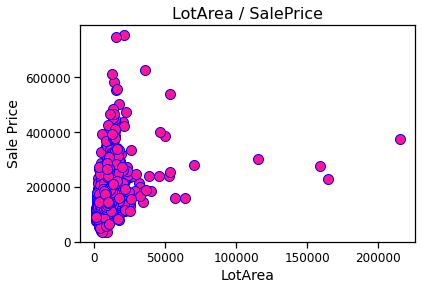

In [42]:
plt.scatter(data['LotArea'],data['SalePrice'], color = 'deeppink', edgecolor = 'blue', s = 100)
plt.title('LotArea / SalePrice',fontsize = 16)
plt.xlabel('LotArea', fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

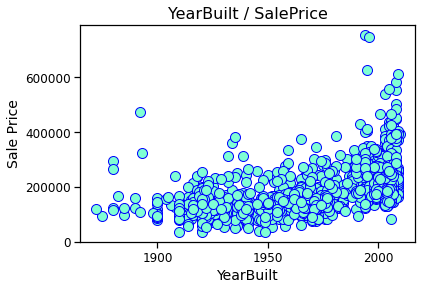

In [43]:
plt.scatter(data['YearBuilt'],data['SalePrice'], color = 'aquamarine', edgecolor = 'blue', s = 100)
plt.title('YearBuilt / SalePrice',fontsize = 16)
plt.xlabel('YearBuilt', fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

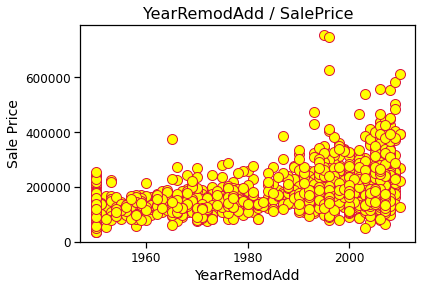

In [44]:
plt.scatter(data['YearRemodAdd'],data['SalePrice'], color = 'yellow', edgecolor = 'crimson', s = 100)
plt.title('YearRemodAdd / SalePrice',fontsize = 16)
plt.xlabel('YearRemodAdd', fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

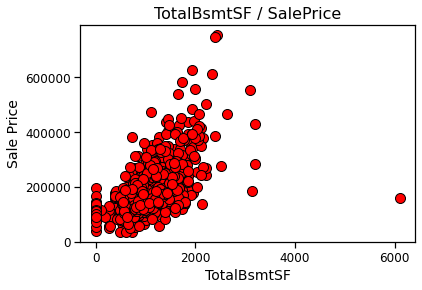

In [45]:
plt.scatter(data['TotalBsmtSF'],data['SalePrice'], color = 'red', edgecolor = 'black', s = 100)
plt.title('TotalBsmtSF / SalePrice',fontsize = 16)
plt.xlabel('TotalBsmtSF', fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

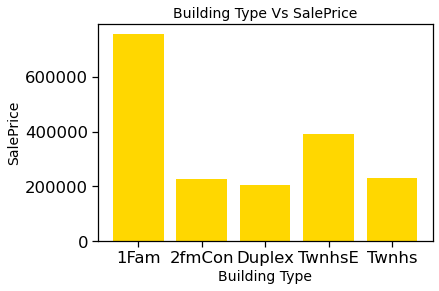

In [46]:
plt.bar(data['BldgType'],data['SalePrice'], color='gold')
plt.title('Building Type Vs SalePrice', fontsize=14)
plt.xlabel('Building Type', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.show()

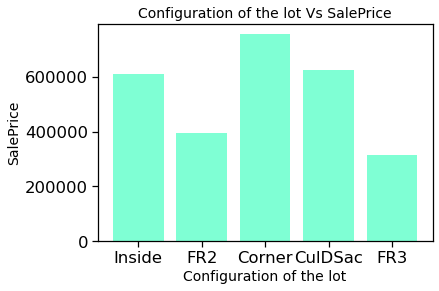

In [47]:
plt.bar(data['LotConfig'],data['SalePrice'], color='aquamarine')
plt.title('Configuration of the lot Vs SalePrice', fontsize=14)
plt.xlabel('Configuration of the lot', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.show()

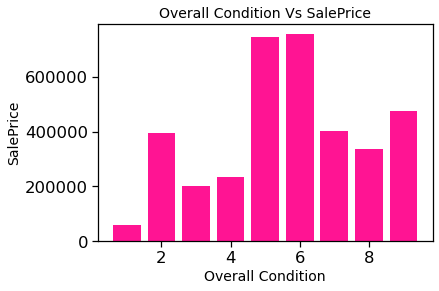

In [48]:
plt.bar(data['OverallCond'],data['SalePrice'], color='deeppink')
plt.title('Overall Condition Vs SalePrice', fontsize=14)
plt.xlabel('Overall Condition', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.show()

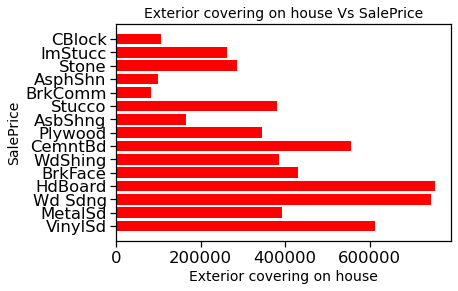

In [49]:
plt.barh(data['Exterior1st'],data['SalePrice'], color='red')
plt.title('Exterior covering on house Vs SalePrice', fontsize=14)
plt.xlabel('Exterior covering on house', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.show()

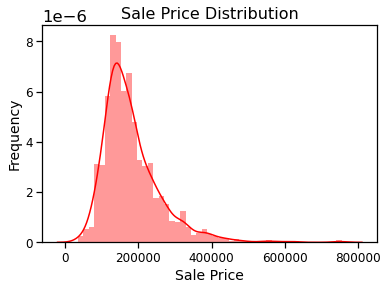

In [50]:
sns.distplot(data['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

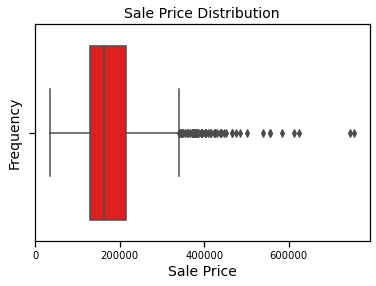

In [51]:
sns.boxplot(data['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 14)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='BldgType'>

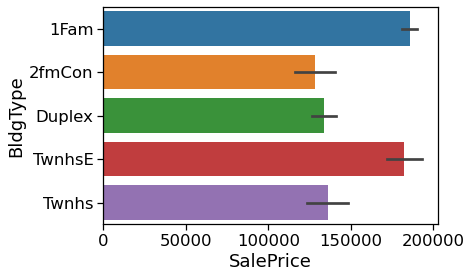

In [52]:
sns.barplot(x='SalePrice',y='BldgType',data=data)

<AxesSubplot:>

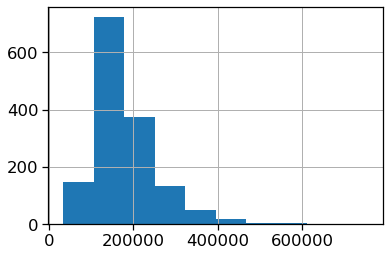

In [53]:
data['SalePrice'].hist()

<AxesSubplot:xlabel='SalePrice'>

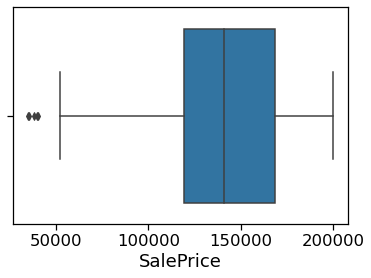

In [54]:
sns.boxplot(x=data['SalePrice'][data['SalePrice'] <= 200000])

In [55]:
mean_yearremo = data.groupby('YearRemodAdd')['SalePrice'].mean().sort_values()
print(mean_yearremo)

YearRemodAdd
1952    110398.600000
1950    117463.056180
1971    120230.555556
1954    121142.857143
1982    121271.428571
            ...      
2007    224807.250000
2006    229471.134021
2008    269709.100000
2009    284085.391304
2010    336963.500000
Name: SalePrice, Length: 61, dtype: float64


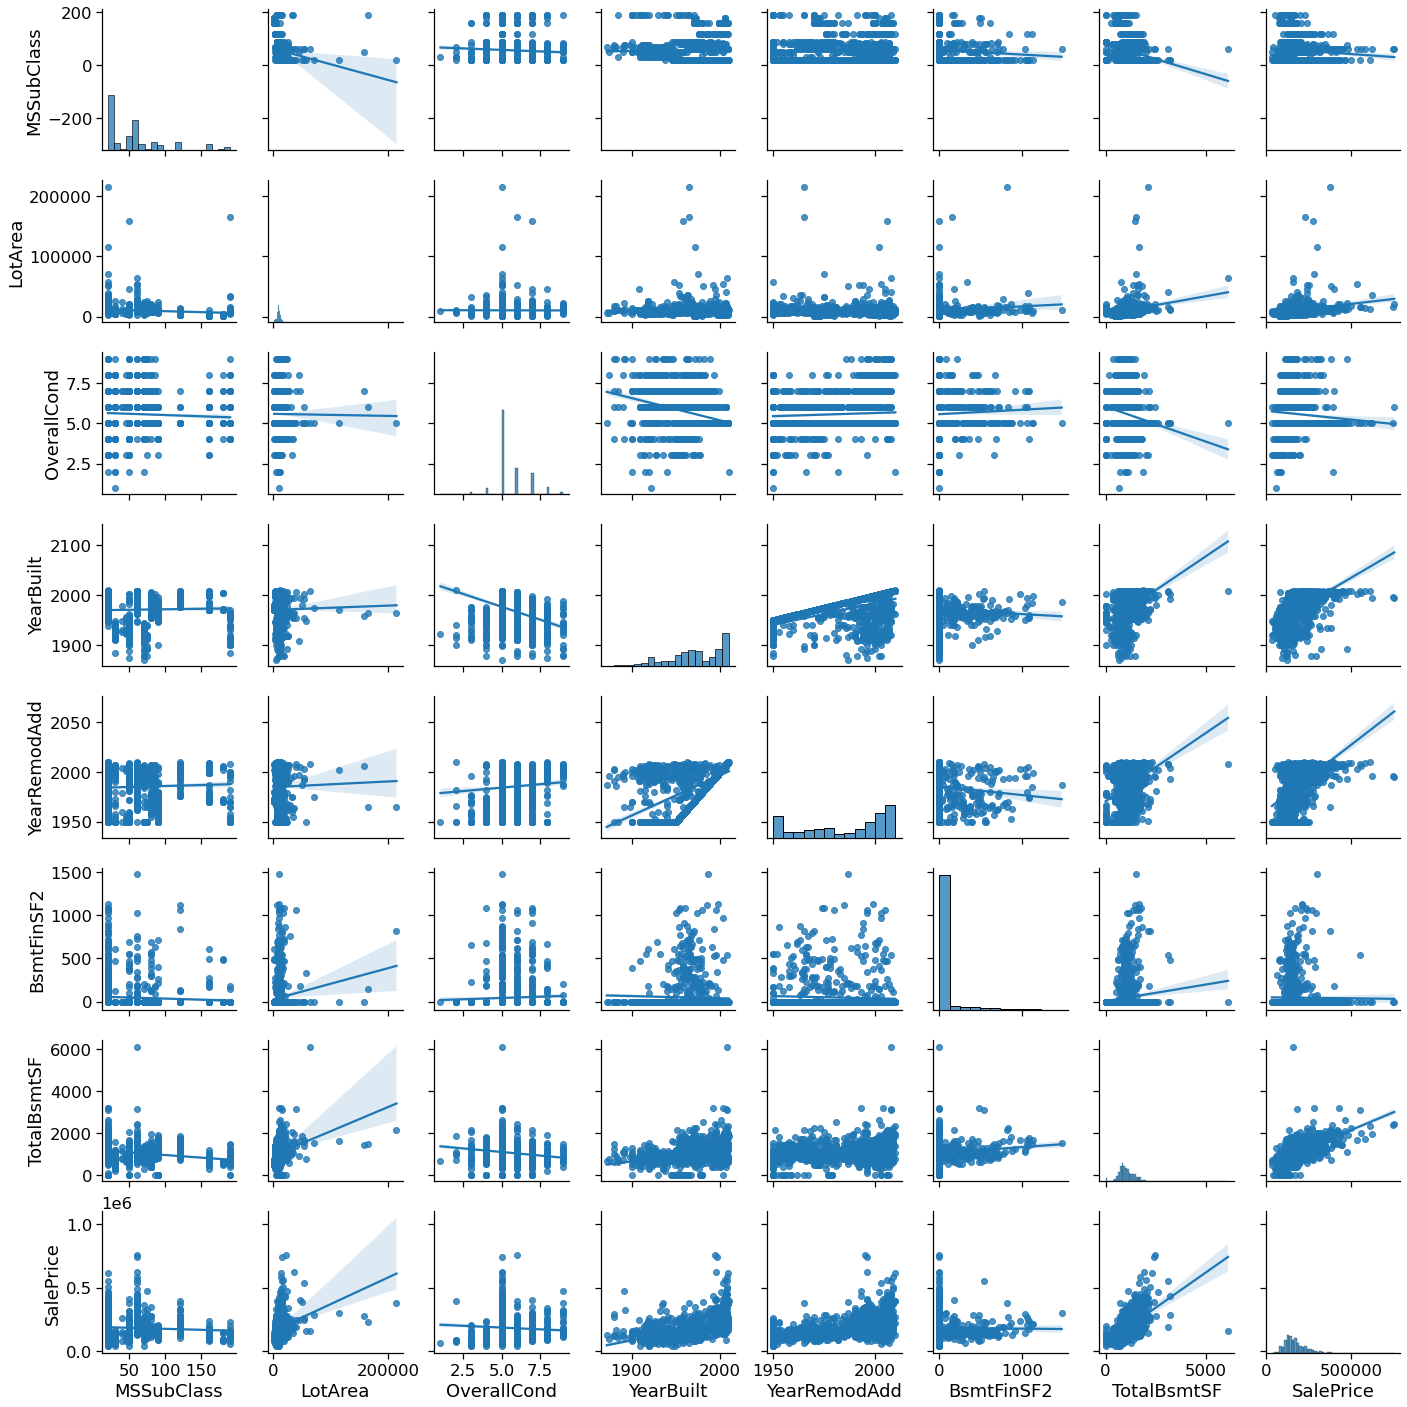

In [56]:
sns.pairplot(data, kind="reg")

<AxesSubplot:xlabel='Exterior1st'>

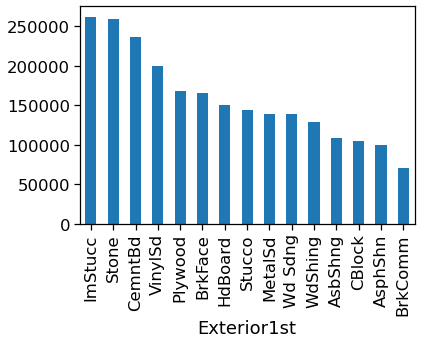

In [57]:
data.groupby('Exterior1st')['SalePrice'].median().sort_values(ascending=False).plot(kind='bar')

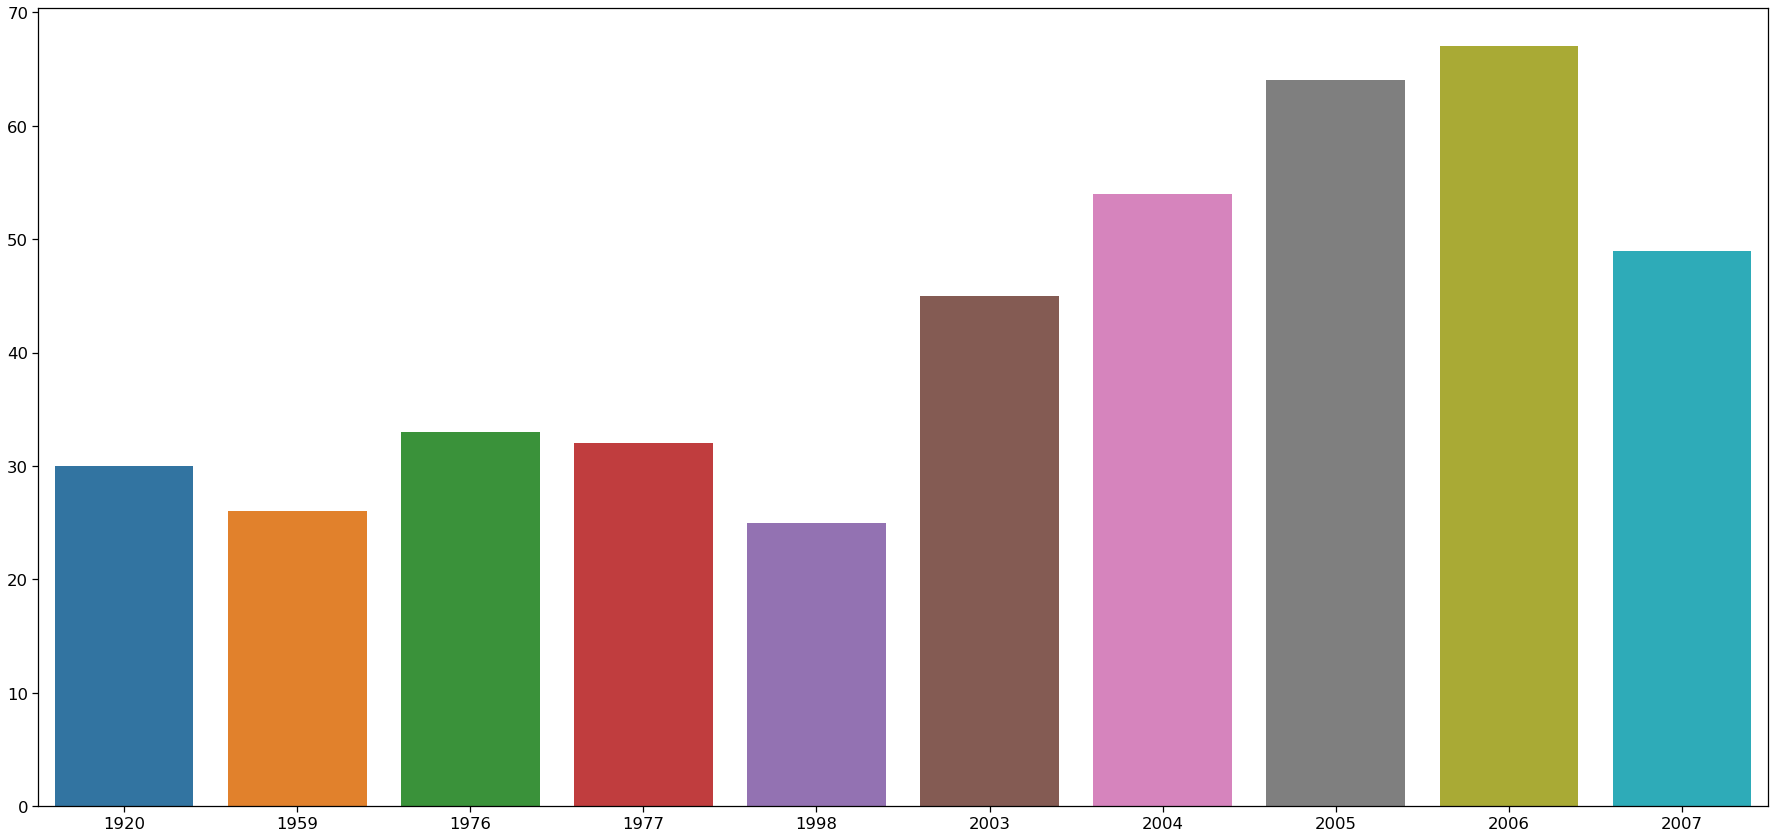

In [58]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data['YearBuilt'].value_counts()[:10].index,y=data['YearBuilt'].value_counts()[:10].values)
plt.tight_layout()

In [59]:
minsaleprice=min(data['SalePrice'])
maxsaleprice=max(data['SalePrice'])
meansaleprice=data['SalePrice'].mean()
print('Minimum Saleprice :',minsaleprice)
print('Maximum Saleprice :',maxsaleprice)
print('Mean Saleprice :',meansaleprice)

Minimum Saleprice : 34900.0
Maximum Saleprice : 755000.0
Mean Saleprice : 180921.19589041095


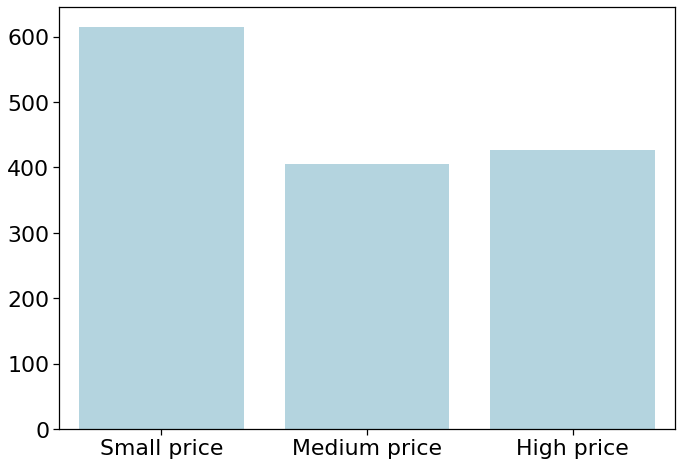

In [60]:
small_price = data[(data['SalePrice']>=34000)&(data['SalePrice']<150000)]
avg_price = data[(data['SalePrice']>=150001)&(data['SalePrice']<200000)]
high_price = data[(data['SalePrice']>200000)]

plt.figure(figsize=(10,7))
sns.set_context('notebook',font_scale = 2.0)
sns.barplot(x=['Small price','Medium price','High price'],y=[len(small_price),len(avg_price),len(high_price)],color='lightblue')
plt.tight_layout() 

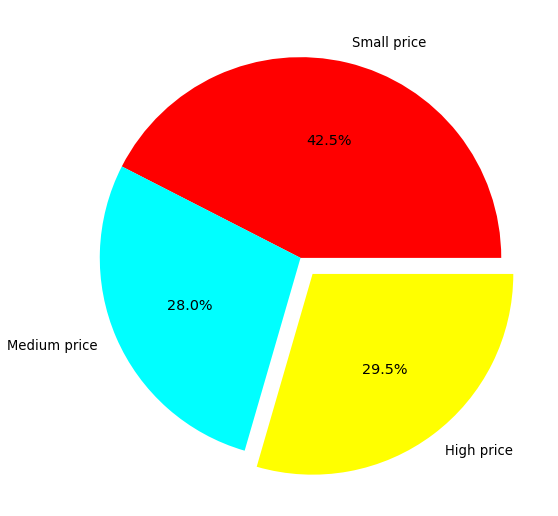

In [61]:
small_price = data[(data['SalePrice']>=34000)&(data['SalePrice']<150000)]
avg_price = data[(data['SalePrice']>=150001)&(data['SalePrice']<200000)]
high_price = data[(data['SalePrice']>200000)]

colors = ['red','cyan','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(small_price),len(avg_price),len(high_price)],labels=['Small price','Medium price','High price'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

In [62]:
from sklearn.preprocessing import OneHotEncoder
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))
OH_cols.index = data.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [63]:
df_final


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,x0_C (all),x0_FV,...,x3_CemntBd,x3_HdBoard,x3_ImStucc,x3_MetalSd,x3_Plywood,x3_Stone,x3_Stucco,x3_VinylSd,x3_Wd Sdng,x3_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,1999,2000,0.0,953.0,175000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))
OH_cols.index = data.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


### Splitting Dataset into Training and Testing 
X and Y SPLITTING 
Y contains the SalePrice column and X contains all the other columns.

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.7, test_size=0.3, random_state=0)
  

## Model and Accuracy
We have trained the model to determine the continuous values. We used three regression model:
1. SUPPORT VECTOR MACHINE
2. RANDOM FOREST REGRESSOR
3. LINEAR REGRESSOR

We are using mean absolute percentage error imported from sklearn library.

In [66]:
lis=[]
lis1=['SVM','Random Forest','Linear Regression']

In [67]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

lis.append((mean_absolute_percentage_error(Y_valid, Y_pred)))





In [68]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

lis.append(mean_absolute_percentage_error(Y_valid, Y_pred))


In [69]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

lis.append((mean_absolute_percentage_error(Y_valid, Y_pred)))


In [70]:
for i in range(3):
    print(lis1[i],':',lis[i])

SVM : 0.30779816446406144
Random Forest : 0.12991780363469885
Linear Regression : 0.19393941296876321


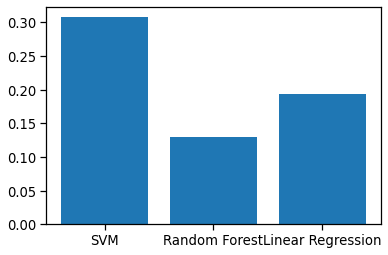

In [71]:
plt.bar(lis1, lis)
plt.show()


# CONCLUSION

### Clearly, Random Forest model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.13 approx. 